## Introduction to business problem


## Introduction

* Mumbai also known as Bombay is the capital city of the Indian state of Maharashtra.According to United Nations,as 2018 Mumbai is the second most populas city in India after Delhi.Mumbai also known as Wealthiest city in India.There are lot of Tourist places like Gateway of India,Elephant Caves and a lot.Many tourists visits Mumbai daily,as it is densly populated area it is difficult to find the what restaurants are there and where they are.For people who used to live in or visiting Mumbai,how do you know what are the best places are to get something to eat?

## Business Problem

* For this project iam going to create a simple guide on where to eat based on the foursquare likes,restaurant category and geographic location data for restaurants in Mumbai.I will then cluster these restaurants based on the similarities so that the user can easily determine what type of restaurants are best to eat based on FourSquare user feedback

## Data Required


 For this assignment,I will be utilizing the FourSquare API to pull the following location data on restaurants in Mumbai,India:
    * venue Id
    * venue Name
    * venue Location
    * venue Category


## Data Acquisition Approach

To acquire the data mentioned above,I  use the following:
  * Get geolocator lat and long coordinates for Mumbai,India.
  * use FourSquare API to get a list of all venues in Mumbai
      * Get venue name,venue ID,Location,category and likes

## Algorithm used

I will take the gathered data and will create a k-means clustering algorithm that groups the restaurant into 3-4 clusters so that people looking to eat can easily see which restaurants are the best to eat,what cusine is available and where in Mumbai they can look to eat

## Data Preparation and Pull

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncoment this line if you have not completed foursquare api lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes #uncomment this line if you have not completed foursquare api lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


## Finding geo data for mumbai

In [3]:
address='Mumbai,India'
geolocator=Nominatim()
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of Hyderabad are {},{}.'.format(latitude,longitude))

The geographical coordinate of Hyderabad are 18.9387711,72.8353355.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


In [4]:
CLIENT_ID ='FZBZN5FPFEFTAPOSJCAX14VY4HW5PA0J3JYMWBZVYMYFDPFL' # your Foursquare ID
CLIENT_SECRET = 'ZYM0DNOFM4KKTPLLLV1WIP3VKPAIRP2GW1BUSLKOTY0VZV0O'# your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: FZBZN5FPFEFTAPOSJCAX14VY4HW5PA0J3JYMWBZVYMYFDPFL
CLIENT_SECRET:ZYM0DNOFM4KKTPLLLV1WIP3VKPAIRP2GW1BUSLKOTY0VZV0O


#### creating url for all venues in mumbai

In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1500 # define radius
 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=FZBZN5FPFEFTAPOSJCAX14VY4HW5PA0J3JYMWBZVYMYFDPFL&client_secret=ZYM0DNOFM4KKTPLLLV1WIP3VKPAIRP2GW1BUSLKOTY0VZV0O&v=20180604&ll=18.9387711,72.8353355&radius=1500&limit=100'

In [6]:
results=requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5dd2d3350be7b4001b86b55c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 150,
  'suggestedBounds': {'ne': {'lat': 18.952271113500014,
    'lng': 72.8495815011288},
   'sw': {'lat': 18.925271086499986, 'lng': 72.8210894988712}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4caa0096d971b1f7ccca23e1',
       'name': 'Royal China',
       'location': {'address': 'Waudby Road',
        'lat': 18.938715239156295,
        'lng': 72.83293313173236,
        'labeledLatLngs': [{'label': 'display',
          'lat': 18.938715239156295,
          'lng': 

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### cleaning json and structured into dataframe

In [8]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name','venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

df2=nearby_venues
df2


,name,id,categories,lat,lng
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183
5,Starbucks,507fcb7a498e5d07b1604ea2,Coffee Shop,18.932190,72.833959
6,Mahesh Lunch Home,4b0587d6f964a520a5a322e3,Indian Restaurant,18.934121,72.833821
7,Ideal Corner,4bdaa0332a3a0f47ad8eabb6,Indian Restaurant,18.934961,72.834050
8,Food for Thought,4cfe22077f2db1f745873bd4,Café,18.932031,72.831667
9,Chhatrapati Shivaji Maharaj Terminus,4babe4fff964a520f8d23ae3,Train Station,18.940088,72.835257


In [9]:
# finding a list of all unique catefories
df2['categories'].unique()


array(['Chinese Restaurant', 'Bar', 'Indian Restaurant', 'Bakery',
       'Parsi Restaurant', 'Coffee Shop', 'Café', 'Train Station',
       'Cricket Ground', 'Park', 'Seafood Restaurant', 'Clothing Store',
       'Monument / Landmark', 'Athletics & Sports', 'Bookstore',
       'Fast Food Restaurant', 'Multiplex', 'Ice Cream Shop',
       'Food Truck', 'Scenic Lookout', 'Dessert Shop', 'Asian Restaurant',
       'Art Gallery', 'Hotel', 'Gym / Fitness Center', 'Market',
       'Middle Eastern Restaurant', 'Irani Cafe', 'Beach',
       'Japanese Restaurant', 'Boutique', 'Breakfast Spot',
       'History Museum', 'Deli / Bodega', 'Cheese Shop', 'Gift Shop',
       'Italian Restaurant', 'Pizza Place', 'Lounge', 'Flea Market',
       'Plaza', 'Gastropub', 'Music Store', "Men's Store",
       'General Entertainment', 'Movie Theater', 'Field',
       'College Academic Building', 'Donut Shop', 'Sandwich Place',
       'Vegetarian / Vegan Restaurant'], dtype=object)

In [10]:
removal_list=['Train Station','Cricket Ground','Park','Clothing Store','Monument / Landmark','Athletics & Sports','Bookstore','Multiplex','Scenic Lookout','Beach','Gym / Fitness Center','Market','Boutique','History Museum','Gift Shop','Lounge','Flea Market','Plaza','Music Store','Art Gallery',"Men's Store",'General Entertainment','Movie Theater','Field','College Academic Building']
df3=df2.copy()
df3=df3[~df3['categories'].isin(removal_list)]
df3


,name,id,categories,lat,lng
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183
5,Starbucks,507fcb7a498e5d07b1604ea2,Coffee Shop,18.932190,72.833959
6,Mahesh Lunch Home,4b0587d6f964a520a5a322e3,Indian Restaurant,18.934121,72.833821
7,Ideal Corner,4bdaa0332a3a0f47ad8eabb6,Indian Restaurant,18.934961,72.834050
8,Food for Thought,4cfe22077f2db1f745873bd4,Café,18.932031,72.831667
11,Cafe Excelsior,4c714f4fd7fab1f715d760c9,Café,18.937701,72.833566


In [11]:
id_list=df3['id'].tolist()
id_list

['4caa0096d971b1f7ccca23e1',
 '5263e1ba11d265711e8024bf',
 '4b0587d9f964a52023a422e3',
 '4d8ea9e0788c54812b363ffd',
 '4d15a8e1816af04db4d444c2',
 '507fcb7a498e5d07b1604ea2',
 '4b0587d6f964a520a5a322e3',
 '4bdaa0332a3a0f47ad8eabb6',
 '4cfe22077f2db1f745873bd4',
 '4c714f4fd7fab1f715d760c9',
 '4c190902d4d9c928e755f029',
 '4dc777edcc3ff3b304696c5a',
 '4b0587cef964a52081a222e3',
 '4b0587d5f964a52078a322e3',
 '4dde5caed16415421840ebf8',
 '4bcad1c0b6c49c74ab2e9191',
 '4d691357342b8cfa3170c32c',
 '4ba9e19cf964a520ee3b3ae3',
 '4bdac9bb2a3a0f47edf9abb6',
 '4bc1ccdff8219c74f1c6b310',
 '536752ce498e2b4b282cc871',
 '4b0587cff964a5208ca222e3',
 '4bcf4de40ffdce72215fb2c0',
 '5215d00311d235bf4fe158e9',
 '4eb24b53f5b9448388486154',
 '4b585e02f964a520a35428e3',
 '504baadbe4b0f7c8cec6d556',
 '5459cbe9498eee5f1b02db55',
 '4b0587e3f964a520aca522e3',
 '50641103e4b0974e7bfea249',
 '4c024e8e0d0e0f479fed009a',
 '4b0587e2f964a5209da522e3',
 '4b10ba37f964a520237523e3',
 '526a32a711d29613276717b2',
 '52ee592a498e

In [12]:
len(id_list)


69

#### Creating url list

In [15]:
url_list=[]
like_list=[]
json_list=[]

for i in id_list:
    venue_url='https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID,CLIENT_SECRET,VERSION)
    url_list.append(venue_url)
for link in url_list:
    result=requests.get(link).json()
    likes=result['response']['likes']['count']
    like_list.append(likes)

print(like_list)

[36, 16, 17, 40, 126, 586, 26, 18, 52, 31, 18, 21, 147, 112, 8, 11, 121, 38, 33, 33, 41, 120, 14, 5, 22, 60, 56, 45, 8, 110, 108, 34, 23, 87, 26, 51, 27, 284, 162, 16, 31, 52, 19, 15, 10, 7, 23, 103, 24, 4, 23, 104, 12, 26, 9, 37, 57, 81, 5, 6, 7, 17, 33, 0, 30, 8, 10, 6, 48]


In [16]:
Mumbai_venues=df3
Mumbai_venues.head()

,name,id,categories,lat,lng
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183


In [17]:
# combining list of likes to dataframe
Mumbai_venues['total_likes']=like_list
Mumbai_venues.head()


,name,id,categories,lat,lng,total_likes
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933,36
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464,16
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853,17
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591,40
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183,126


In [18]:
print(round(Mumbai_venues['total_likes'].max()),
       round(Mumbai_venues['total_likes'].min()),
       round(Mumbai_venues['total_likes'].median()),
       round(Mumbai_venues['total_likes'].mean()))


586 0 27 52


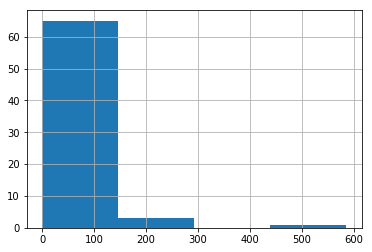

In [20]:
import matplotlib.pyplot as plt
Mumbai_venues['total_likes'].hist(bins=4)
plt.show()

In [21]:
print(round(np.percentile(Mumbai_venues['total_likes'],25)))
print(round(np.percentile(Mumbai_venues['total_likes'],50)))
print(np.percentile(Mumbai_venues['total_likes'],75))


15.0
27.0
52.0


In [22]:
lesslikes=Mumbai_venues['total_likes']<=15
averagelikes=Mumbai_venues['total_likes']<=27
morelikes=Mumbai_venues['total_likes']<=52
greatlikes=Mumbai_venues['total_likes']>52

In [23]:
def conditions(s):
    if s['total_likes']<=15:
     return 'lesslikes'
    if s['total_likes']<=27:
     return 'averagelikes'
    if s['total_likes']<=52:
     return 'morelikes'
    if s['total_likes']>52:
     return 'greatlikes'
Mumbai_venues['total_like_category']=Mumbai_venues.apply(conditions,axis=1)

In [24]:
Mumbai_venues

,name,id,categories,lat,lng,total_likes,total_like_category
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933,36,morelikes
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464,16,averagelikes
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853,17,averagelikes
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591,40,morelikes
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183,126,greatlikes
5,Starbucks,507fcb7a498e5d07b1604ea2,Coffee Shop,18.932190,72.833959,586,greatlikes
6,Mahesh Lunch Home,4b0587d6f964a520a5a322e3,Indian Restaurant,18.934121,72.833821,26,averagelikes
7,Ideal Corner,4bdaa0332a3a0f47ad8eabb6,Indian Restaurant,18.934961,72.834050,18,averagelikes
8,Food for Thought,4cfe22077f2db1f745873bd4,Café,18.932031,72.831667,52,morelikes
11,Cafe Excelsior,4c714f4fd7fab1f715d760c9,Café,18.937701,72.833566,31,morelikes


##### To know how many unique values are there in Mumbai_venues DataFrame

In [25]:
Mumbai_venues['categories'].unique()

array(['Chinese Restaurant', 'Bar', 'Indian Restaurant', 'Bakery',
       'Parsi Restaurant', 'Coffee Shop', 'Café', 'Seafood Restaurant',
       'Fast Food Restaurant', 'Ice Cream Shop', 'Food Truck',
       'Dessert Shop', 'Asian Restaurant', 'Hotel',
       'Middle Eastern Restaurant', 'Irani Cafe', 'Japanese Restaurant',
       'Breakfast Spot', 'Deli / Bodega', 'Cheese Shop',
       'Italian Restaurant', 'Pizza Place', 'Gastropub', 'Donut Shop',
       'Sandwich Place', 'Vegetarian / Vegan Restaurant'], dtype=object)

#### Assingning a category 

In [26]:
bar=['Pub','Deli / Bodega','Gastropub','Bar']
Fast_food=['Chinese Restaurant','Fast Food Restaurant']
asian_food=['Parsi Restaurant','Asian Restaurant','Japanese Restaurant','Seafood Restaurant']
Italian_food=['Italian Restaurant','Middle Eastern Restaurant']
India_food=['Indian Restaurant','Vegetarian / Vegan Restaurant','Hotel','Breakfast Spot','Food Truck']
others=['Sandwich Place','Donut Shop','Coffee Shop','Bakery','Café','Ice Cream Shop','Dessert Shop','Irani Cafe','Cheese Shop','Pizza Place']

In [27]:
def conditions1(s):
     if s['categories'] in bar:
        return 'bar'
     if s['categories'] in Fast_food:
        return 'Fast_food'
     if s['categories'] in asian_food:
        return 'asian_food'
     if s['categories'] in Italian_food:
        return 'Italian_food'
     if s['categories'] in India_food:
        return 'India_food'
     if s['categories'] in others:
        return 'others'
    
Mumbai_venues['assigned_cat']=Mumbai_venues.apply(conditions1,axis=1)

In [28]:
Mumbai_venues

,name,id,categories,lat,lng,total_likes,total_like_category,assigned_cat
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933,36,morelikes,Fast_food
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464,16,averagelikes,bar
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853,17,averagelikes,India_food
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591,40,morelikes,others
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183,126,greatlikes,asian_food
5,Starbucks,507fcb7a498e5d07b1604ea2,Coffee Shop,18.932190,72.833959,586,greatlikes,others
6,Mahesh Lunch Home,4b0587d6f964a520a5a322e3,Indian Restaurant,18.934121,72.833821,26,averagelikes,India_food
7,Ideal Corner,4bdaa0332a3a0f47ad8eabb6,Indian Restaurant,18.934961,72.834050,18,averagelikes,India_food
8,Food for Thought,4cfe22077f2db1f745873bd4,Café,18.932031,72.831667,52,morelikes,others
11,Cafe Excelsior,4c714f4fd7fab1f715d760c9,Café,18.937701,72.833566,31,morelikes,others


In [29]:
# one hot encoding
Mumbai_onehot = pd.get_dummies(Mumbai_venues[['assigned_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Mumbai_onehot['Neighborhood'] = Mumbai_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [Mumbai_onehot.columns[-1]] + list(Mumbai_onehot.columns[:-1])
Mumbai_onehot = Mumbai_onehot[fixed_columns]

Mumbai_onehot


,Neighborhood,Fast_food,India_food,Italian_food,asian_food,bar,others
0,Royal China,1,0,0,0,0,0
1,Town House Cafe,0,0,0,0,1,0
2,Sher-E-Punjab,0,1,0,0,0,0
3,Yazdani Bakery,0,0,0,0,0,1
4,Britannia & Co.,0,0,0,1,0,0
5,Starbucks,0,0,0,0,0,1
6,Mahesh Lunch Home,0,1,0,0,0,0
7,Ideal Corner,0,1,0,0,0,0
8,Food for Thought,0,0,0,0,0,1
11,Cafe Excelsior,0,0,0,0,0,1


#### Clustering

In [35]:
# set number of clusters
kclusters = 4

Mumbai_clustering = Mumbai_onehot.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mumbai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([3, 0, 2, 1, 0, 1, 2, 2, 1, 1], dtype=int32)

In [36]:
Mumbai_venues['label']=kmeans.labels_
Mumbai_venues


,name,id,categories,lat,lng,total_likes,total_like_category,assigned_cat,label
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933,36,morelikes,Fast_food,3
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464,16,averagelikes,bar,0
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853,17,averagelikes,India_food,2
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591,40,morelikes,others,1
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183,126,greatlikes,asian_food,0
5,Starbucks,507fcb7a498e5d07b1604ea2,Coffee Shop,18.932190,72.833959,586,greatlikes,others,1
6,Mahesh Lunch Home,4b0587d6f964a520a5a322e3,Indian Restaurant,18.934121,72.833821,26,averagelikes,India_food,2
7,Ideal Corner,4bdaa0332a3a0f47ad8eabb6,Indian Restaurant,18.934961,72.834050,18,averagelikes,India_food,2
8,Food for Thought,4cfe22077f2db1f745873bd4,Café,18.932031,72.831667,52,morelikes,others,1
11,Cafe Excelsior,4c714f4fd7fab1f715d760c9,Café,18.937701,72.833566,31,morelikes,others,1


#### Visualizing the clusters

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Mumbai_venues['lat'], Mumbai_venues['lng'], Mumbai_venues['name'], Mumbai_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

### Cluster 1

In [43]:
Mumbai_venues.loc[Mumbai_venues['label'] == 0]

,name,id,categories,lat,lng,total_likes,total_like_category,assigned_cat,label
1,Town House Cafe,5263e1ba11d265711e8024bf,Bar,18.938550,72.833464,16,averagelikes,bar,0
4,Britannia & Co.,4d15a8e1816af04db4d444c2,Parsi Restaurant,18.934683,72.840183,126,greatlikes,asian_food,0
14,Pratap Lunch Home,4dc777edcc3ff3b304696c5a,Seafood Restaurant,18.933605,72.832854,21,averagelikes,asian_food,0
17,Trishna,4b0587d5f964a52078a322e3,Seafood Restaurant,18.928619,72.832356,112,greatlikes,asian_food,0
29,Burma Burma,536752ce498e2b4b282cc871,Asian Restaurant,18.929590,72.832043,41,morelikes,asian_food,0
35,Dakshin Bar And Kitchen,5215d00311d235bf4fe158e9,Seafood Restaurant,18.936489,72.837490,5,lesslikes,asian_food,0
36,Gulshan-E-Iran,4eb24b53f5b9448388486154,Middle Eastern Restaurant,18.948118,72.835427,22,averagelikes,Italian_food,0
39,Umame,504baadbe4b0f7c8cec6d556,Japanese Restaurant,18.931966,72.828243,56,greatlikes,asian_food,0
45,The Pantry,50641103e4b0974e7bfea249,Deli / Bodega,18.928775,72.832256,110,greatlikes,bar,0
50,Salt Water Cafe,526a32a711d29613276717b2,Italian Restaurant,18.933500,72.826300,87,greatlikes,Italian_food,0


### Cluster 2

In [39]:
Mumbai_venues.loc[Mumbai_venues['label'] == 1]

,name,id,categories,lat,lng,total_likes,total_like_category,assigned_cat,label
3,Yazdani Bakery,4d8ea9e0788c54812b363ffd,Bakery,18.933191,72.833591,40,morelikes,others,1
5,Starbucks,507fcb7a498e5d07b1604ea2,Coffee Shop,18.932190,72.833959,586,greatlikes,others,1
8,Food for Thought,4cfe22077f2db1f745873bd4,Café,18.932031,72.831667,52,morelikes,others,1
11,Cafe Excelsior,4c714f4fd7fab1f715d760c9,Café,18.937701,72.833566,31,morelikes,others,1
16,Kyani & Co.,4b0587cef964a52081a222e3,Café,18.944062,72.828576,147,greatlikes,others,1
24,K Rustoms. Ice Cream,4d691357342b8cfa3170c32c,Ice Cream Shop,18.933478,72.824995,121,greatlikes,others,1
25,Natural's Ice Cream Parlour,4ba9e19cf964a520ee3b3ae3,Ice Cream Shop,18.934892,72.824222,38,morelikes,others,1
28,Volga Paan Wala,4bc1ccdff8219c74f1c6b310,Dessert Shop,18.932315,72.832497,33,morelikes,others,1
30,Kala Ghoda Café,4b0587cff964a5208ca222e3,Café,18.928515,72.832354,120,greatlikes,others,1
37,Café Universal,4b585e02f964a520a35428e3,Irani Cafe,18.936021,72.837453,60,greatlikes,others,1


### Cluster 3

In [41]:
Mumbai_venues.loc[Mumbai_venues['label'] == 2]

,name,id,categories,lat,lng,total_likes,total_like_category,assigned_cat,label
2,Sher-E-Punjab,4b0587d9f964a52023a422e3,Indian Restaurant,18.937944,72.837853,17,averagelikes,India_food,2
6,Mahesh Lunch Home,4b0587d6f964a520a5a322e3,Indian Restaurant,18.934121,72.833821,26,averagelikes,India_food,2
7,Ideal Corner,4bdaa0332a3a0f47ad8eabb6,Indian Restaurant,18.934961,72.834050,18,averagelikes,India_food,2
12,Taste of Kerala,4c190902d4d9c928e755f029,Indian Restaurant,18.934205,72.833215,18,averagelikes,India_food,2
22,Balwas,4bcad1c0b6c49c74ab2e9191,Indian Restaurant,18.939548,72.828311,11,lesslikes,India_food,2
26,Cannon Pav Bhaji,4bdac9bb2a3a0f47edf9abb6,Food Truck,18.939666,72.834086,33,morelikes,India_food,2
32,Residency Hotel,4bcf4de40ffdce72215fb2c0,Hotel,18.934978,72.833481,14,lesslikes,India_food,2
41,The Nutcracker,5459cbe9498eee5f1b02db55,Breakfast Spot,18.928509,72.833683,45,morelikes,India_food,2
52,"InterContinental Marine Drive, Mumbai",4bc78f5293bdeee1838337ae,Hotel,18.935049,72.824191,51,morelikes,India_food,2
53,Oye Kake,4e73041ad16472c036f84ec2,Indian Restaurant,18.933034,72.833463,27,averagelikes,India_food,2


### Cluster 4

In [42]:
Mumbai_venues.loc[Mumbai_venues['label'] == 3]

,name,id,categories,lat,lng,total_likes,total_like_category,assigned_cat,label
0,Royal China,4caa0096d971b1f7ccca23e1,Chinese Restaurant,18.938715,72.832933,36,morelikes,Fast_food,3
21,H Parmesha Fast Food Corner,4dde5caed16415421840ebf8,Fast Food Restaurant,18.930392,72.833549,8,lesslikes,Fast_food,3
49,Badshah,4b10ba37f964a520237523e3,Fast Food Restaurant,18.947244,72.833456,23,averagelikes,Fast_food,3
57,The J,507926afe4b0801688753f43,Fast Food Restaurant,18.930374,72.826734,16,averagelikes,Fast_food,3
64,Golden Dragon,50aa6378e4b0034097bc6c14,Chinese Restaurant,18.928479,72.832493,10,lesslikes,Fast_food,3
78,Kamling,4b0587d5f964a52095a322e3,Chinese Restaurant,18.933526,72.825715,12,lesslikes,Fast_food,3
83,5 Spice,4be18fe88815b713ef9e6406,Chinese Restaurant,18.933491,72.835955,57,greatlikes,Fast_food,3
84,McDonald's,4b7b66b2f964a52011622fe3,Fast Food Restaurant,18.938985,72.834504,81,greatlikes,Fast_food,3
90,Burger King,554dd58b498e1d5fa7c78c22,Fast Food Restaurant,18.934036,72.827060,17,averagelikes,Fast_food,3
